# Chess Countries' Stats

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [5]:
fide = pd.read_xml("./xmls/standard_aug22frl_xml.xml")

In [6]:
fide.head()

fideid                      name country sex title w_title o_title  \
0  25121731                A C J John     IND   M  None    None    None   
1  35077023            A Chakravarthy     IND   M  None    None    None   
2  10207538          A E M, Doshtagir     BAN   M  None    None    None   
3  10680810  A hamed Ashraf, Abdallah     EGY   M  None    None    None   
4   5716365           A Hamid, Harman     MAS   M  None    None    None   

  foa_title  rating  games   k  birthday flag  
0      None    1063      0  40    1987.0    i  
1      None    1151      0  40    1986.0    i  
2      None    1840      0  40    1974.0    i  
3      None    1728      0  40    2001.0    i  
4      None    1325      0  40    1970.0    i

## General info

In [13]:
# fide.head()

In [14]:
# fide.describe().transpose()

In [15]:
# fide['sex'].value_counts()

In [16]:
# fide.info()

## EDA

In [9]:
fide['title'].value_counts()

FM     8486
IM     3941
CM     2030
WFM    1802
GM     1770
WIM     843
WCM     797
WGM     323
WH        1
Name: title, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

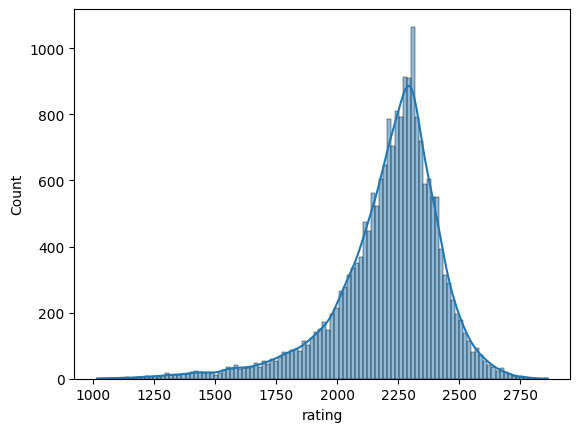

In [20]:
sns.histplot(data=fide[~fide['title'].isna()], x='rating', kde=True)

<Axes: xlabel='rating', ylabel='Count'>

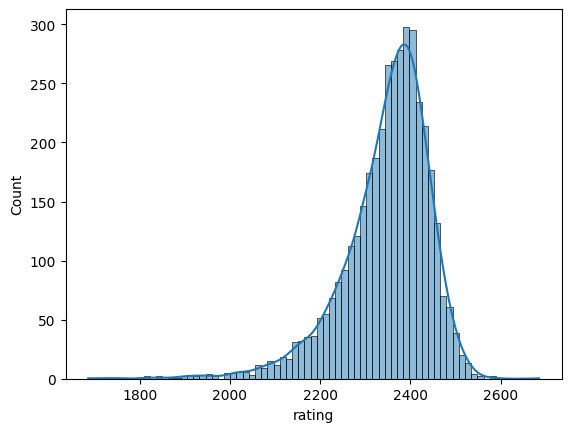

In [24]:
sns.histplot(data=fide[fide['title']=='IM'], x='rating', kde=True)

<Axes: xlabel='rating', ylabel='Count'>

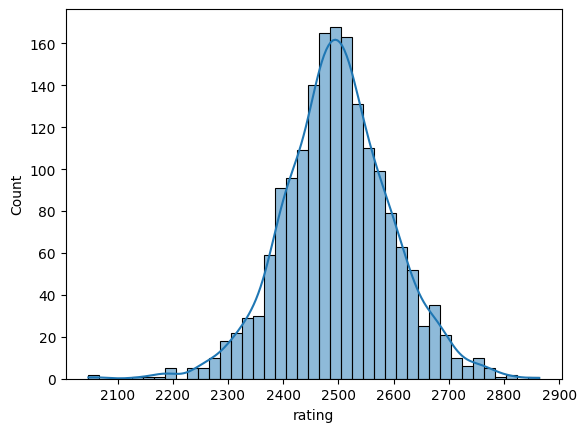

In [11]:
sns.histplot(data=fide[fide['title']=='GM'], x='rating', kde=True)

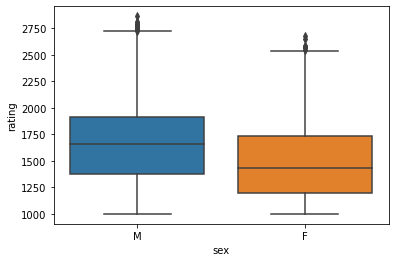

In [11]:
sns.boxplot(data=fide, y='rating', x='sex')

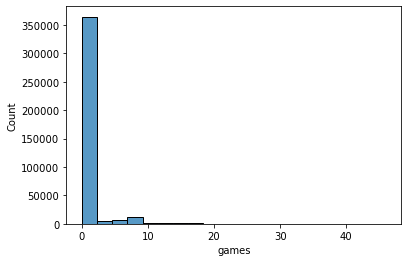

In [13]:
sns.histplot(data=fide['games'])

In [17]:
fide.sort_values('games', ascending=False)

fideid                             name country sex title w_title  \
231609   3325687           Mollo Figueroa, Nicole     BOL   F  None    None   
212740   4211324            Marianidis, Dimitrios     GRE   M  None    None   
297042   3839850       Rojas Salas, Rihanna Irina     PER   F  None    None   
291409   3844340  Reyes Zavaleta, Cristhian Yamil     PER   M  None    None   
291412   3845494   Reyes Zavaleta, Sergio Gabriel     PER   M  None    None   
...          ...                              ...     ...  ..   ...     ...   
136743   1738992                    Hattab, Nuhad     SWE   M  None    None   
136742   1721798                   Hattab, Hashim     SWE   M  None    None   
136741   1538209       Hatta-Nilsen, Odin Andreas     NOR   M  None    None   
136740   1524062             Hatta, Lemet Mihkkal     NOR   M  None    None   
393376  21857814              Zyznowska, Marianna     POL   F  None    None   

       o_title foa_title  rating  games   k  birthday  flag  
231609    None      None    1419     46  40    2011.0     w  
212740    None      None    1568     46  20    1966.0  None  
297042    None      None    1240     45  40    2012.0     w  
291409    None      None    1547     41  40    2010.0  None  
291412    None      None    1219     40  40    2011.0  None  
...        ...       ...     ...    ...  ..       ...   ...  
136743    None      None    1496      0  40    2004.0     i  
136742    None      None    1857      0  20    1961.0     i  
136741    None      None    1083      0  40    2007.0     i  
136740    None      None    1507      0  40    1998.0  None  
393376    None      None    1150      0  40    2004.0    wi  

[393377 rows x 13 columns]

In [35]:
played_percentege = 100*(fide['games'] > 0).sum()/len(fide['games'])
print(f'{played_percentege}%')

8.08003518253482%


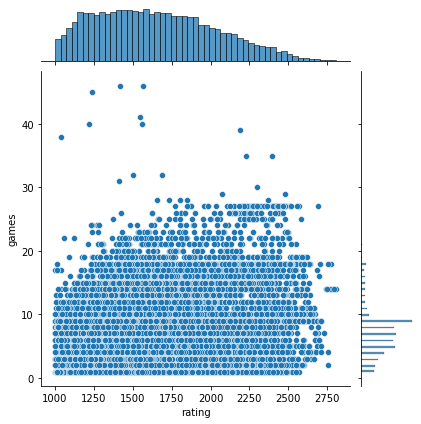

In [26]:
sns.jointplot(data=fide[fide['games']>0], x='rating', y='games')

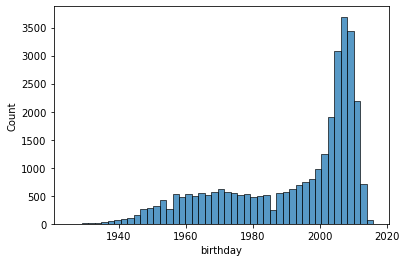

In [30]:
sns.histplot(fide[fide['games']>0]['birthday'])

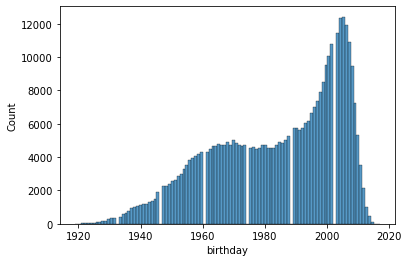

In [31]:
sns.histplot(fide['birthday'])

In [25]:
fide.corr()

fideid    rating     games         k  birthday
fideid    1.000000 -0.194368  0.042722  0.142231  0.112305
rating   -0.194368  1.000000  0.047085 -0.513348 -0.389480
games     0.042722  0.047085  1.000000 -0.018387  0.124535
k         0.142231 -0.513348 -0.018387  1.000000  0.334640
birthday  0.112305 -0.389480  0.124535  0.334640  1.000000

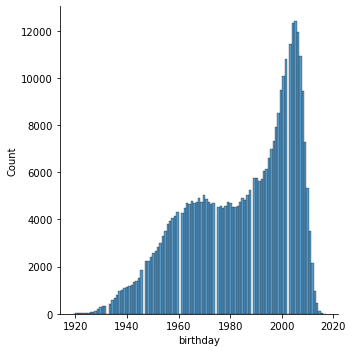

In [36]:
sns.displot(fide[fide['birthday'] > 0]['birthday'])

## Feature engineering (titles and countries)

### Taking care of a few non-conventional country names

In [4]:
fide_codes = pd.read_csv('fide_codes.csv')

In [5]:
fide_codes.head()

Code               Country
0  AFG           Afghanistan
1  AHO  Netherlands Antilles
2  ALB               Albania
3  ALG               Algeria
4  AND               Andorra

In [6]:
fide_codes.columns = ['country', 'country name']

In [7]:
codes_dict = fide_codes.set_index('country').to_dict()['country name']

In [8]:
fide['country name'] = fide['country'].apply(lambda c: codes_dict[c])

In [9]:
populations = pd.read_csv('pop.csv')

In [10]:
populations.head()

cca2                      name      pop2022      pop2020      pop2050  \
0   CN                     China  1448471.400  1439323.776  1402405.170   
1   IN                     India  1406631.776  1380004.385  1639176.033   
2   US  United States of America   334805.269   331002.651   379419.102   
3   ID                 Indonesia   279134.505   273523.615   330904.664   
4   PK                  Pakistan   229488.994   220892.340   338013.196   

       pop2030  pop2019      pop2015      pop2010      pop2000      pop1990  \
0  1464340.159        0  1406847.870  1368810.615  1290550.765  1176883.674   
1  1503642.322        0  1310152.403  1234281.170  1056575.549   873277.798   
2   349641.876        0   320878.310   309011.475   281710.909   252120.309   
3   299198.430        0   258383.256   241834.215   211513.823   181413.402   
4   262958.794        0   199426.964   179424.641   142343.578   107647.921   

       pop1980     pop1970     area   Density  GrowthRate  WorldPercentage  \
0  1000089.235  827601.394  9706961  149.2199      1.0029           0.1821   
1   698952.844  555189.792  3287590  427.8611      1.0095           0.1768   
2   229476.354  209513.341  9372610   35.7217      1.0057           0.0421   
3   147447.836  114793.178  1904569  146.5605      1.0100           0.0351   
4    78054.343   58142.060   881912  260.2176      1.0190           0.0289   

   rank  
0     1  
1     2  
2     3  
3     4  
4     5

In [11]:
pop2022 = populations[['name','pop2022']].set_index('name')
pop2022

pop2022
name                                 
China                     1448471.400
India                     1406631.776
United States of America   334805.269
Indonesia                  279134.505
Pakistan                   229488.994
...                               ...
Montserrat                      4.965
Falkland Islands                3.539
Niue                            1.622
Tokelau                         1.378
Vatican City                    0.799

[232 rows x 1 columns]

In [12]:
pop2022 = pop2022.append(pd.DataFrame(index=['Swaziland', 'Kosovo'], data=[1160000,1873000], columns=['pop2022']))

In [13]:
pop2022.rename(index={'United States Virgin Islands':'U.S. Virgin Islands'},inplace=True)

In [14]:
pop2022.rename(index={'Great Britain':'United Kingdom'},inplace=True)

In [15]:
pop2022.rename(index={'North Macedonia':'Macedonia'},inplace=True)

In [16]:
nieche_countries_dict = {
    'Bosnia & Herzegovina' : 'Bosnia and Herzegovina',
    'England' : 'United Kingdom',
    'Wales' : 'United Kingdom',
    'Jersey' : 'United Kingdom',
    'Scotland' : 'United Kingdom',
    'Antigua & Barbuda' : 'Antigua and Barbuda',
     'Chinese Taipei' : 'China',
     'US Virgin Islands' : 'U.S. Virgin Islands',
     'Netherlands Antilles' : 'Netherlands',
     'St. Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
     'FYR Macedonia' : 'Macedonia',
     'Trinidad & Tobago' : 'Trinidad and Tobago',
     'Democratic Republic of Congo' : 'Zimbabwe',
     "Côte d'Ivoire" : 'Ivory Coast',
     'Guernsey' : 'United Kingdom',
}

In [17]:
# def temp_fix(c):
#     name = c
#     if name == '"U.S. Virgin Islands':
#         name = 'U.S. Virgin Islands'
#     return name
# fide['country name'] = fide['country name'].apply(temp_fix)

In [18]:
def fix_some_countries(name):
    new_name = name
    if name in nieche_countries_dict.keys():
        new_name = nieche_countries_dict[name]
    return new_name

In [19]:
fide['country name'] = fide['country name'].apply(fix_some_countries)

In [20]:
countries = fide.groupby('country name')

In [21]:
countries.count()['fideid'].sort_values().head()

country name
Chad                                1
Cambodia                            2
Saint Vincent and the Grenadines    2
Gabon                               4
Central African Republic            4
Name: fideid, dtype: int64

In [22]:
countries.count()['fideid'].sort_values(ascending=False).head()

country name
Russia     37736
India      35201
Germany    28128
Spain      27951
France     26260
Name: fideid, dtype: int64

In [23]:
# players_per_country

In [24]:
# fide[fide['country']=='UKR'].count()['fideid']

In [25]:
# fide[fide['country']=='CHA']

In [26]:
# median_rating = countries.median()
# median_rating.head()

In [27]:
fide['is titled'] = fide['title'].apply(lambda t: t is not None)

In [28]:
fide['is gm'] = fide['title'].apply(lambda t: t=='GM')

In [29]:
threshold = 2000
fide['above threshold'] = fide['rating'].apply(lambda t: t>=threshold)

In [51]:
fide['is junior'] = fide['birthday'].apply(lambda d: 20 >= (datetime.now().year - d))

In [52]:
fide[['name', 'birthday', 'is junior']]

name  birthday  is junior
0                     A C J John    1987.0      False
1                 A Chakravarthy    1986.0      False
2               A E M, Doshtagir    1974.0      False
3       A hamed Ashraf, Abdallah    2001.0      False
4                A Hamid, Harman    1970.0      False
...                          ...       ...        ...
393372               Zyto, Karol    2006.0       True
393373            Zyubin, Sergey    1975.0      False
393374             Zyuzev, Pavel    1993.0      False
393375            Zywert, Kacper    1999.0      False
393376       Zyznowska, Marianna    2004.0       True

[393377 rows x 3 columns]

In [81]:
fide['prodigy'] = fide['is junior'] & fide['above threshold']

In [62]:
# sns.countplot(data=fide,x='is junior', hue='sex')
# # sns.countplot(data=fide,hue='is junior', x='sex')
# print(100*sum(fide['is junior'])/len(fide))
# print(100*sum(fide[fide['sex']=='M']['is junior'])/len(fide[fide['sex']=='M']))
# print(100*sum(fide[fide['sex']=='F']['is junior'])/len(fide[fide['sex']=='F']))

In [68]:
# sns.histplot(fide[fide['sex']=='F'], x='rating', hue='is junior')

In [82]:
by_country = fide.groupby('country name')

In [70]:
players_per_country = by_country.count()['fideid']

In [38]:
# codes_dict = codes_dict['country name']

In [43]:
# problematic = list(set(median_rating.index).difference(set(fide_codes['country name'])))
# problematic

In [44]:
# fide[fide['country'].isin(problematic)]

In [45]:
# fide.head()

In [86]:
# pop2022.loc['Kosovo']

In [100]:
# non_pop = list(set(median_rating.index).difference(set(pop2022.index)) - set(['Bosnia & Herzegovina', 'England','Wales','Jersey','Scotland']))
# non_pop

In [252]:
# sns.histplot(fide[fide['country name']=='Yemen']['rating'])
fide[fide['country name']=='Cambodia']

fideid              name country sex title w_title o_title foa_title  \
313706  2003139  Schain, Randolph     CAM   M  None    None    None      None   
358101  2001390   Truong, H. Paul     CAM   M    FM    None    None      None   

        rating  games   k  birthday flag country name  is titles  is gm  
313706    2165      0  20    1958.0    i     Cambodia      False  False  
358101    2335      0  40    1965.0    i     Cambodia       True  False

In [101]:
# set(feds.index).intersection(set(pop2022))

In [102]:
# feds.index

In [103]:
# codes = pd.read_csv('codes.csv')

In [104]:
# codes.head()

In [105]:
# codes.set_index('Code',inplace=True)

In [106]:
# codes.info()

In [107]:
# codes.head()

In [108]:
# codes.index

In [109]:
# feds.index

In [110]:
# len(set(feds.index).intersection(set(codes.index)))

In [111]:
# set(feds.index) - set(codes.index)

## Maps

In [71]:
median_countries = by_country.median()

data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = median_countries.index,
        locationmode = "country names",
        z = median_countries['rating'],
        text = median_countries['rating'],
        colorbar = {'title' : 'Rating By Countery'},
      )

In [72]:
layout = dict(title = 'Rating Median By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

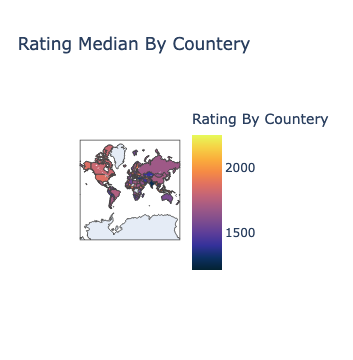

In [73]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [74]:
mean_countries = by_country.mean()

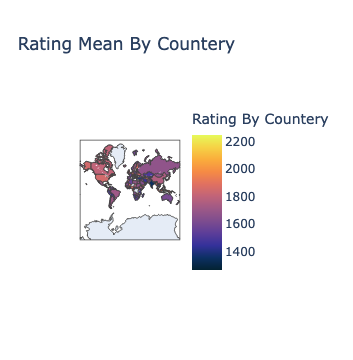

In [75]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = mean_countries.index,
        locationmode = "country names",
        z = mean_countries['rating'],
        text = mean_countries['rating'],
        colorbar = {'title' : 'Rating By Countery'},
      )

layout = dict(title = 'Rating Mean By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

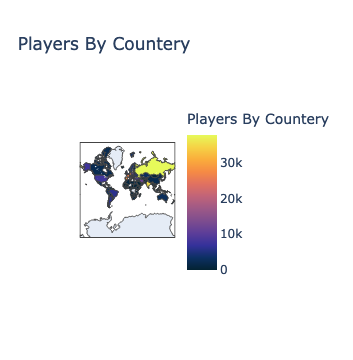

In [76]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = players_per_country.index,
        locationmode = "country names",
        z = players_per_country,
        text = players_per_country,
        colorbar = {'title' : 'Players By Countery'},
      )

layout = dict(title = 'Players By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [77]:
gms_by_country = by_country.sum()['is gm']
titled_by_country = by_country.sum()['is titled']

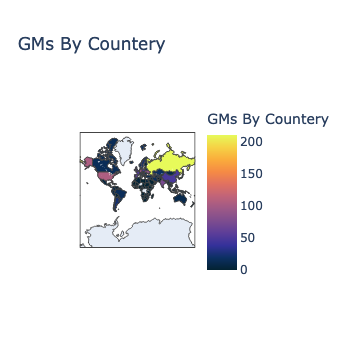

In [78]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = gms_by_country.index,
        locationmode = "country names",
        z = gms_by_country,
        text = gms_by_country,
        colorbar = {'title' : 'GMs By Countery'},
      )

layout = dict(title = 'GMs By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

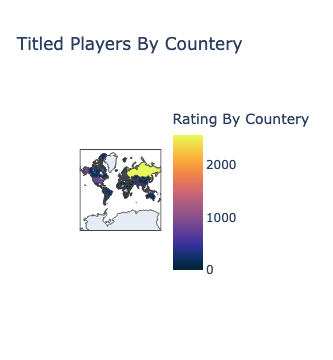

In [79]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = titled_by_country.index,
        locationmode = "country names",
        z = titled_by_country,
        text = titled_by_country,
        colorbar = {'title' : 'Rating By Countery'},
      )

layout = dict(title = 'Titled Players By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [83]:
prodigies_by_counry = by_country.sum()['prodigy']

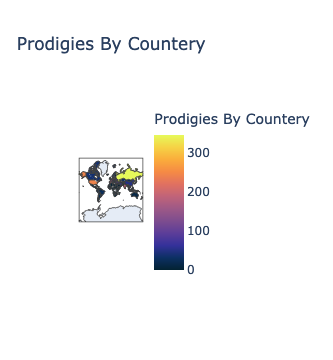

In [84]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = prodigies_by_counry.index,
        locationmode = "country names",
        z = prodigies_by_counry,
        text = prodigies_by_counry,
        colorbar = {'title' : 'Prodigies By Countery'},
      )

layout = dict(title = 'Prodigies By Countery',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## And now Lets Normalize!

In [85]:
list_of_series = [players_per_country.drop('FIDE'), 
                  pop2022.loc[players_per_country.drop('FIDE').index]['pop2022'], 
                 titled_by_country, 
                 gms_by_country,
                 prodigies_by_counry]
countries_data = pd.concat(list_of_series, axis=1)

In [89]:
countries_data.rename(columns={'fideid': 'players'}, inplace=True)
countries_data.head()

players    pop2022  is titled  is gm  prodigy
country name                                               
Afghanistan      93.0  40754.388         11      0        0
Albania         279.0   2866.374         23      1        1
Algeria         840.0  45350.148         73      3        4
Andorra          76.0     77.463         14      3        4
Angola          486.0  35027.343         33      0        3

In [90]:
countries_data_normalized = pd.DataFrame()
countries_data_normalized['players'] = countries_data['players'] / countries_data['pop2022']
countries_data_normalized['is titled'] = countries_data['is titled'] / countries_data['pop2022']
countries_data_normalized['is gm'] = countries_data['is gm'] / countries_data['pop2022']
countries_data_normalized['prodigy'] = countries_data['prodigy'] / countries_data['pop2022']
countries_data_normalized['pop2022'] = countries_data['pop2022']

In [91]:
countries_data_normalized.head()

players  is titled     is gm   prodigy    pop2022
country name                                                    
Afghanistan   0.002282   0.000270  0.000000  0.000000  40754.388
Albania       0.097336   0.008024  0.000349  0.000349   2866.374
Algeria       0.018523   0.001610  0.000066  0.000088  45350.148
Andorra       0.981114   0.180731  0.038728  0.051638     77.463
Angola        0.013875   0.000942  0.000000  0.000086  35027.343

In [92]:
filter_smallest = countries_data_normalized[countries_data_normalized['pop2022'] > 500]

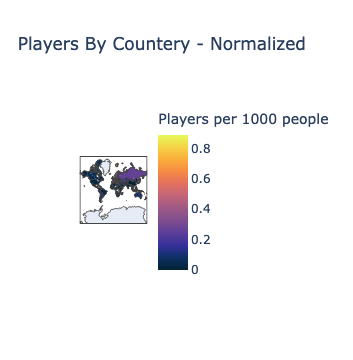

In [37]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = filter_smallest.index,
        locationmode = "country names",
        z = filter_smallest['players'],
        text = filter_smallest['players'],
        colorbar = {'title' : 'Players per 1000 people'},
      )

layout = dict(title = 'Players By Countery - Normalized',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

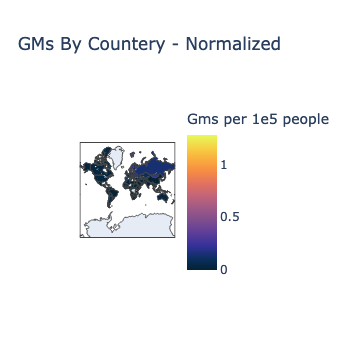

In [38]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = filter_smallest.index,
        locationmode = "country names",
        z = filter_smallest['is gm']*100,
        text = filter_smallest['is gm']*100,
        colorbar = {'title' : 'Gms per 1e5 people'},
      )

layout = dict(title = 'GMs By Countery - Normalized',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

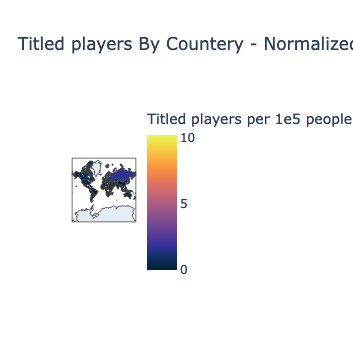

In [39]:
data = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = filter_smallest.index,
        locationmode = "country names",
        z = filter_smallest['is titled']*100,
        text = filter_smallest['is titled']*100,
        colorbar = {'title' : 'Titled players per 1e5 people'},
      )

layout = dict(title = 'Titled players By Countery - Normalized',
              geo = dict(projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## Same thing but in tables

In [238]:
filter_smallest['is gm'].sort_values(ascending=False).head(10)*100

country name
Armenia       1.278615
Montenegro    1.273987
Georgia       0.755908
Croatia       0.739046
Serbia        0.600947
Hungary       0.541314
Latvia        0.540881
Slovenia      0.529346
Israel        0.526735
Bulgaria      0.511352
Name: is gm, dtype: float64

In [257]:
filter_smallest['is titled'].sort_values(ascending=False).head(20)*100

country name
Montenegro                10.191894
Serbia                     7.003338
Slovenia                   6.640892
Croatia                    6.552877
Hungary                    5.142481
Armenia                    4.609743
Estonia                    4.084998
Latvia                     3.732076
Suriname                   3.518584
Georgia                    3.451979
Czech Republic             3.371587
Mongolia                   3.285892
Bosnia and Herzegovina     3.262224
Austria                    2.856604
Cuba                       2.839288
Norway                     2.776079
Luxembourg                 2.646446
Denmark                    2.622130
Israel                     2.521604
Slovakia                   2.490754
Name: is titled, dtype: float64

In [261]:
filter_smallest['players'].sort_values(ascending=False).head(21)*100

country name
Croatia           88.857991
Czech Republic    79.576901
Denmark           77.224312
Slovakia          76.828786
Slovenia          75.070956
Montenegro        75.005972
Hungary           69.569226
Norway            68.766931
Serbia            65.283596
Spain             59.827725
Greece            59.796618
Luxembourg        51.060836
Armenia           47.106865
Lithuania         45.196543
Latvia            44.406294
Austria           43.599056
Sweden            41.794815
France            40.039937
Estonia           37.143225
Georgia           34.419002
Israel            34.215364
Name: players, dtype: float64

In [93]:
filter_smallest['prodigy'].sort_values(ascending=False).head(20)*100

country name
Slovenia          1.203060
Montenegro        1.114738
Armenia           0.975785
Estonia           0.907777
Hungary           0.884840
Slovakia          0.879090
Czech Republic    0.838240
Mongolia          0.740066
Norway            0.707628
Israel            0.661221
Lithuania         0.601118
Croatia           0.566602
Cuba              0.477637
Serbia            0.450710
Austria           0.441174
Greece            0.436189
Bulgaria          0.423692
Spain             0.395983
Latvia            0.378616
Denmark           0.359900
Name: prodigy, dtype: float64

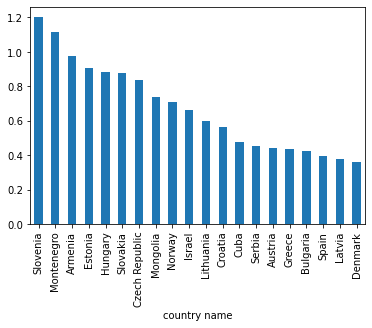

In [134]:
# sns.countplot(data=filter_smallest.head(10), y='Prodigies')
# filter_smallest['Prodigies'].sort_values().plot(kind='bar')
(100*filter_smallest['Prodigies'].sort_values(ascending=False).head(20)).plot(kind='bar')

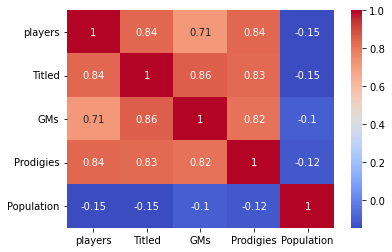

In [122]:
# filter_smallest.rename(columns={'is gm':'GMs', 'is titled':'Titled Players', 'prodigy' : 'Prodigies', 'pop2022' : 'Population'},inplace=True)
sns.heatmap(filter_smallest.corr(), annot=True, cmap='coolwarm')

### Cheking on the big names

In [251]:
filter_smallest.rename(columns={'is gm':'gms', 'is titled':'titled'},inplace=True)

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
# filter_smallest['gms'] = filter_smallest['gms'].apply(lambda x:x*100)
# filter_smallest['titled'] = filter_smallest['titled'].apply(lambda x:x*100)
# filter_smallest['players'] = filter_smallest['players'].apply(lambda x:x*100)
filter_smallest.loc[['Croatia','Israel','Norway', 
                     'United States of America', 'Russia', 'China', 'India', 'Germany']]*100

players    titled       gms      pop2022
country name                                                        
Croatia                   88.857991  6.552877  0.739046     405928.6
Israel                    34.215364  2.521604  0.526735     892289.2
Norway                    68.766931  2.776079  0.326598     551137.0
United States of America   2.335089  0.251788  0.031063   33480526.9
Russia                    25.880975  1.761931  0.144713   14580594.7
China                      0.130275  0.014015  0.003314  144847140.0
India                      2.502503  0.035190  0.005261  140663177.6
Germany                   33.532182  1.787000  0.114444    8388359.6

In [95]:
countries_data_per1e5 = filter_smallest*100

In [96]:
c = countries_data_per1e5.reset_index()
c = c[(c['players'] > 50) | (c['is gm'] > 0.4)]
c = c.reset_index()

Text(0, 0.5, 'No. GMs per 100k')

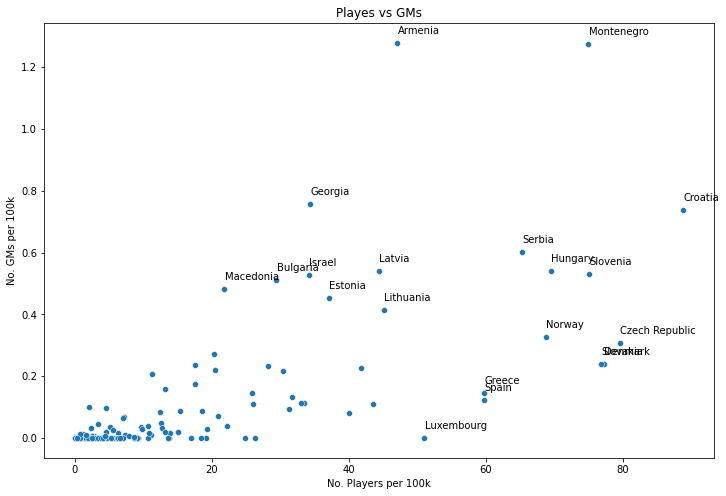

In [159]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=countries_data_per1e5, x='players', y='is gm')
for i in range(c.shape[0]):
    plt.text(x=c.loc[i]['players']+0.03,y=c.loc[i]['is gm']+0.03,s=c.loc[i]['country name'])

plt.title('Playes vs GMs')
plt.xlabel('No. Players per 100k') #x label
plt.ylabel('No. GMs per 100k') #y label

In [107]:
c2 = countries_data_per1e5.reset_index()
c2 = c2[(c2['prodigy'] > 0.5) | (c2['is gm'] > 0.35)]
c2 = c2.reset_index()

Text(0.5, 0, 'No. GMs per 100k')

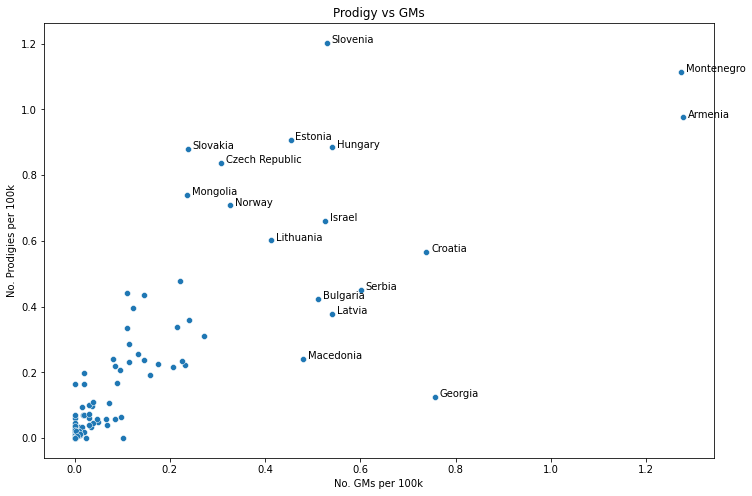

In [112]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=countries_data_per1e5, x='is gm', y='prodigy')
for i in range(c2.shape[0]):
    plt.text(y=c2.loc[i]['prodigy'],x=c2.loc[i]['is gm']+0.01,s=c2.loc[i]['country name'])

plt.title('Prodigy vs GMs')
plt.ylabel('No. Prodigies per 100k') #x label
plt.xlabel('No. GMs per 100k') #y label

In [89]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

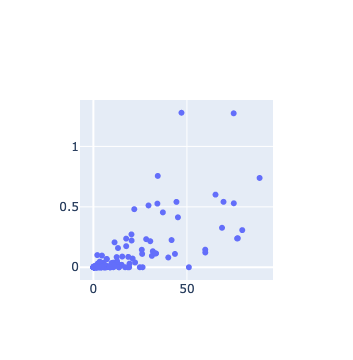

In [122]:
go.Figure(go.Scatter(
    x=countries_data_per1e5['players'], y=countries_data_per1e5['is gm'],
    text=countries_data_per1e5.index,
    mode='markers',
    name='%{x}:%{y}'
))                       

In [117]:
countries_data_per1e5.sort_values(by='players')

players  is titled     is gm      pop2022
country name                                               
Chad             0.005743   0.000000  0.000000    1741358.0
Swaziland        0.006034   0.000259  0.000000  116000000.0
Cambodia         0.011649   0.005825  0.000000    1716863.9
Kosovo           0.015003   0.000801  0.000000  187300000.0
Mali             0.065196   0.013971  0.000000    2147376.4
...                   ...        ...       ...          ...
Slovenia        75.070956   6.640892  0.529346     207803.4
Slovakia        76.828786   2.490754  0.238087     546019.3
Denmark         77.224312   2.622130  0.239934     583495.0
Czech Republic  79.576901   3.371587  0.307355    1073678.4
Croatia         88.857991   6.552877  0.739046     405928.6

[162 rows x 4 columns]

In [85]:
median_players = countries_data['players'].median()
top_players_countries = countries_data['players'].nlargest(20)
# countries_data[countries_data['players'] > median_players].corr()
top_20_countries_by_players = countries_data.loc[top_players_countries.index]
top_20_countries_by_players.corr()

players   pop2022  is titled     is gm
players    1.000000  0.484199   0.662971  0.622362
pop2022    0.484199  1.000000   0.042117  0.192239
is titled  0.662971  0.042117   1.000000  0.941168
is gm      0.622362  0.192239   0.941168  1.000000

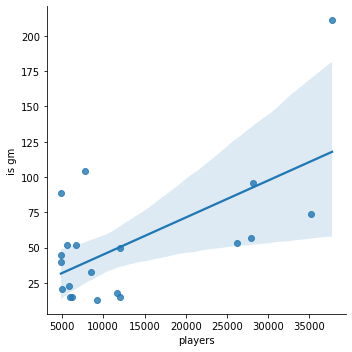

In [86]:
sns.lmplot(data=top_20_countries_by_players, x='players', y='is gm')